### Visualizations
Metadata Neighborhood Tabulation Areas (NTAs) were created to project populations at a small area level, from 2000 to 2030 for PlaNYC, the long-term sustainability plan for New York City. Since population size affects the error associated with population projections, these geographic units needed to have a minimum population, which we determined to be 15,000. This criterion resulted in combinations of neighborhoods that probably would not occur if one were solely designating boundaries of historical neighborhoods. Moreover, the neighborhood names associated with the neighborhood tabulation areas are not intended to be definitive. Another feature of the sustainability plan, was the creation of projections for Public Use Microdata Areas (PUMAs), which are approximations of New York City’s Community Districts developed for use with the Census Bureau’s Public Use Microdata Samples (PUMS). In order to make the boundaries consistent with PUMAs, NTAs were created using whole census tracts, from the 2010 census, within PUMAs. Since NTAs were not permitted to cross PUMA boundaries, this further restricted our ability to identify what may be thought of as historical neighborhood boundaries. Thus, users need to be cognizant of the reason why NTAs were created and the demographic/geographic constraints inherent in how they were configured. Despite these limitations, NTAs are a valuable summary level for use with both the 2010 Census and the American Community Survey (ACS). Regarding the decennial census, these geographic areas offer a good compromise between the very detailed data for census tracts (2,168) and the broad strokes provided by community districts (59). For the ACS, NTAs offer a statistically reliable alternative to the high sampling error that renders data for most individual census tracts unusable.

In [1]:
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import geopandas as gpd

In [2]:
# set up seaborn for plot consistency
def sns_reset():
    sns.set(font_scale = 1.2)
#     sns.set_style('white')
#     sns.set_style('ticks')
    sns.despine()
    # sns.set_context('poster')
    
    # colors and axes
    global color_set
    color_set = 'Blues_r' # adjust this colorset
    sns.set_palette('Blues_r')
    f, ax = plt.subplots()
    f.set_size_inches(7, 5)
    return f, ax

In [3]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

NameError: name 'df' is not defined

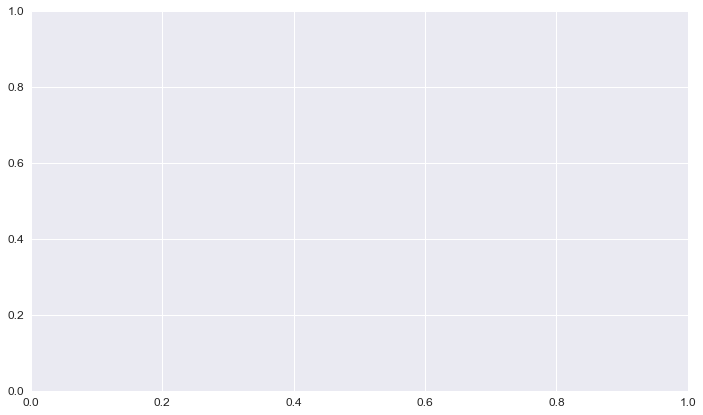

In [4]:
# plot airline graphs
sns.set()
f, ax = sns_reset()
f.set_size_inches(10, 6)

# set fonts
font = {'fontname':'Arial'}

sns.barplot(y = df.Borough, \
            x = df.late_response, \
           palette = 'Blues_r')
plt.title('Distribution of flight counts in 2017 for major American airlines', **font)
plt.xlabel('Number of distinct domestic flights', **font)
plt.ylabel('American airline name', **font)

plt.savefig('./visualizations/airline-flight-distribution.png', dpi = 600)
plt.show()

In [23]:
# https://towardsdatascience.com/lets-make-a-map-using-geopandas-pandas-and-matplotlib-to-make-a-chloropleth-map-dddc31c1983d
# https://data.cityofnewyork.us/City-Government/NTA-map/d3qk-pfyz
map_df = gpd.read_file("./geo_export_ed304d49-3aaf-4cbd-9c75-28380a34d7c6.shp")
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df.head()

,shape_area,ntacode,ntaname,shape_leng,countyfips,borocode,boroname,geometry
0,3.579964e+07,BK43,Midwood,27996.591274,047,3.0,Brooklyn,POLYGON ((-73.94732672160586 40.62916656720947...
1,3.262983e+07,BK75,Bedford,29992.919174,047,3.0,Brooklyn,POLYGON ((-73.94193078816201 40.70072523469552...
2,6.307284e+06,BX40,Fordham South,15878.272921,005,2.0,Bronx,POLYGON ((-73.89138023380268 40.86170058826308...
3,5.400502e+07,BK88,Borough Park,39247.227722,047,3.0,Brooklyn,"POLYGON ((-73.9760493559142 40.63127590564666,..."
4,3.270695e+07,BK96,Rugby-Remsen Village,30957.853395,047,3.0,Brooklyn,POLYGON ((-73.90855790522774 40.65209593779453...


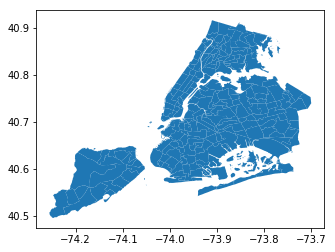

In [24]:
map_df.plot()

In [25]:
df = pd.read_csv('./nta-metadata-3.csv')
df = df.iloc[1:]
df = df.reset_index(drop=True)
df.head()

,NTA_Name,NTA_Code,TotalPop,Female,PopU18,Pop18t24,Pop25t44,Pop45t64,Pop65pl,Hispanic,...,NitricOxide,NitrogenDioxide,Ozone,SulfurDioxide,Daycares,AlcoholRetailers,TobaccoRetailers,FelonyCrime,PropertyCrime,ViolentCrime
0,Brooklyn Heights-Cobble Hill,BK09,23532.0,51.0,12.8,9.4,42.2,22.5,13.1,8.9,...,32.0,23.7,28.4,0.5,21.0,33.1,7.2,11.6,7.4,1.7
1,Sheepshead Bay-Gerritsen Beach-Manhattan Beach,BK17,63459.0,53.6,19.1,7.4,25.3,29.7,18.6,7.1,...,16.5,16.9,33.0,0.4,71.0,21.3,9.6,16.5,9.5,3.0
2,Brighton Beach,BK19,33146.0,53.1,17.6,7.4,24.5,28.4,22.1,12.4,...,18.7,18.0,32.5,0.5,39.0,18.7,8.1,16.1,9.5,4.1
3,Seagate-Coney Island,BK21,29229.0,53.1,22.5,12.2,21.2,24.9,19.3,24.9,...,14.9,15.8,33.7,0.4,27.0,23.9,10.6,32.2,15.5,6.8
4,West Brighton,BK23,14977.0,58.8,7.6,5.3,18.8,31.9,36.3,0.5,...,17.1,17.0,32.7,0.4,6.0,8.7,4.0,14.3,10.3,1.6


In [27]:
df = df[['NTA_Code','PreventHosp']]
# df = df[['nta_code', 'median_income','mean_income']]
min_hosp = df['PreventHosp'].min()
max_hosp = df['PreventHosp'].max()
print(min_hosp, max_hosp)

511.9 4221.4


In [28]:
merged = map_df.set_index('ntacode').join(df.set_index('NTA_Code'))
merged =merged.replace(np.nan, 0) 
merged = merged.loc[merged['PreventHosp'] != 0]
merged = merged.reset_index()
merged['centroid'] = merged['geometry'].centroid

merged

,ntacode,shape_area,ntaname,shape_leng,countyfips,borocode,boroname,geometry,PreventHosp,centroid
0,BK43,3.579964e+07,Midwood,27996.591274,047,3.0,Brooklyn,POLYGON ((-73.94732672160586 40.62916656720947...,1446.5,POINT (-73.95682460579987 40.62092404879829)
1,BK75,3.262983e+07,Bedford,29992.919174,047,3.0,Brooklyn,POLYGON ((-73.94193078816201 40.70072523469552...,2479.2,POINT (-73.94990503494105 40.69150749506858)
2,BX40,6.307284e+06,Fordham South,15878.272921,005,2.0,Bronx,POLYGON ((-73.89138023380268 40.86170058826308...,3255.8,POINT (-73.89953593415377 40.85815519623306)
3,BK88,5.400502e+07,Borough Park,39247.227722,047,3.0,Brooklyn,"POLYGON ((-73.9760493559142 40.63127590564666,...",1105.7,POINT (-73.98866123069084 40.63094965540432)
4,BK96,3.270695e+07,Rugby-Remsen Village,30957.853395,047,3.0,Brooklyn,POLYGON ((-73.90855790522774 40.65209593779453...,1758.3,POINT (-73.92225097387865 40.6523648041028)
5,QN52,2.945438e+07,East Flushing,25843.364956,081,4.0,Queens,POLYGON ((-73.79493246234003 40.75779803007457...,865.0,POINT (-73.80729418195874 40.75410888687151)
6,QN53,3.700132e+07,Woodhaven,28070.585548,081,4.0,Queens,POLYGON ((-73.84913837242911 40.69828274120191...,1505.0,POINT (-73.85576675983751 40.68872135707191)
7,BK44,2.737916e+07,Madison,26237.257341,047,3.0,Brooklyn,POLYGON ((-73.93753749374048 40.60855739025754...,1060.3,POINT (-73.94813559473344 40.60491359572574)
8,QN48,3.416422e+07,Auburndale,32446.878673,081,4.0,Queens,POLYGON ((-73.77573836927105 40.74332564716403...,751.1,POINT (-73.78794887764326 40.75103502570226)
9,BX44,3.627356e+07,Williamsbridge-Olinville,27350.973945,005,2.0,Bronx,POLYGON ((-73.84704957988549 40.88767181587945...,2582.2,POINT (-73.85894857000643 40.88215637427893)


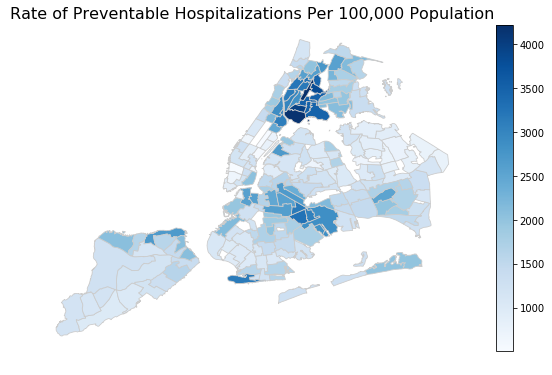

In [36]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'PreventHosp'
# set the range for the choropleth
vmin, vmax = min_hosp, max_hosp
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis('off')

ax.set_title('Rate of Preventable Hospitalizations Per 100,000 Population', fontdict={'fontsize': '16', 'fontweight' : '2'})
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)
fig.savefig("map_export.png", dpi=300)

In [ ]:
from shapely.geometry import Point, Polygon
import geopandas

# https://stackoverflow.com/questions/48097742/geopandas-point-in-polygon
def coord_to_ntacode(lat, long, polys):
    pnt = Point(long, lat)
    for i in range(len(polys)):
        if pnt.within(polys['geometry'][i]):
            return polys.loc[i, 'ntacode']
    else:
        return 'null'
    
def min_dist(lat, long, gpd2):
    point = Point(long, lat)
    gpd2['Dist'] = gpd2.apply(lambda row:  point.distance(row.geometry),axis=1)
    geoseries = gpd2.iloc[gpd2['Dist'].argmin()]
    return geoseries['ntacode']
    
print(min_dist(40.63, -73.93, merged))


service_requests_df = pd.read_csv('./Materials/311_service_requests.csv')
service_requests_df['ntacode'] = ''
service_requests_df.shape

for i in range(len(service_requests_df)):
    print(i)
    service_requests_df.loc[i, 'ntacode'] = min_dist(service_requests_df.loc[i, 'latitude'], service_requests_df.loc[i, 'longitude'], merged)
service_requests_df.to_csv('service_requests_df.csv')

In [18]:
service_requests_df

,unique_key,created_date,closed_date,agency_acronym,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,city,status,due_date,resolution_date,community_board,borough,latitude,longitude,ntacode
0,28272192,06/16/2014 09:34:00 AM,06/16/2014 12:00:00 PM,DSNY,BCC - Brooklyn South,Sanitation Condition,15 Street Cond/Dump-Out/Drop-Off,Street,11232,218 31 STREET,31 STREET,BROOKLYN,Closed,NaN,06/16/2014 12:00:00 PM,07 BROOKLYN,BROOKLYN,40.656066,-73.999805,BK32
1,28272281,06/16/2014 08:21:00 AM,06/16/2014 12:00:00 PM,DSNY,BCC - Brooklyn South,Sanitation Condition,15 Street Cond/Dump-Out/Drop-Off,Street,11234,5207 AVENUE T,AVENUE T,BROOKLYN,Closed,NaN,06/16/2014 12:00:00 PM,18 BROOKLYN,BROOKLYN,40.611781,-73.923889,BK45
2,28272228,06/16/2014 12:00:00 AM,07/15/2014 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,11209,230 94 STREET,94 STREET,BROOKLYN,Closed,07/16/2014 12:13:55 PM,07/15/2014 12:00:00 AM,10 BROOKLYN,BROOKLYN,40.618345,-74.034990,BK31
3,28272229,06/16/2014 12:00:00 AM,07/01/2014 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,11215,NaN,NaN,BROOKLYN,Closed,07/16/2014 02:30:53 PM,07/01/2014 12:00:00 AM,06 BROOKLYN,BROOKLYN,40.662800,-73.978348,BK37
4,28272230,06/16/2014 12:00:00 AM,04/28/2014 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Commercial Building,10002,174 ORCHARD STREET,ORCHARD STREET,NEW YORK,Pending,07/16/2014 11:05:03 PM,04/28/2014 12:00:00 AM,03 MANHATTAN,MANHATTAN,40.721688,-73.988391,MN27
5,28272232,06/16/2014 06:59:00 AM,06/18/2014 12:00:00 PM,DSNY,BCC - Brooklyn North,Sanitation Condition,15 Street Cond/Dump-Out/Drop-Off,Street,11221,WOODBINE STREET,WOODBINE STREET,BROOKLYN,Closed,NaN,06/18/2014 12:00:00 PM,04 BROOKLYN,BROOKLYN,40.690767,-73.918473,BK78
6,28272233,06/16/2014 10:31:00 AM,06/20/2014 12:00:00 PM,DSNY,BCC - Brooklyn North,Sanitation Condition,15 Street Cond/Dump-Out/Drop-Off,Street,11201,76 WILLOUGHBY STREET,WILLOUGHBY STREET,BROOKLYN,Closed,NaN,06/20/2014 12:00:00 PM,02 BROOKLYN,BROOKLYN,40.692167,-73.985745,BK38
7,28272234,06/16/2014 06:48:00 PM,06/17/2014 12:00:00 PM,DSNY,Queens East 10,Sanitation Condition,15 Street Cond/Dump-Out/Drop-Off,Street,11420,NaN,NaN,South Ozone Park,Closed,NaN,06/17/2014 12:00:00 PM,10 QUEENS,QUEENS,40.667899,-73.816844,QN55
8,28272236,06/16/2014 12:00:00 AM,06/20/2014 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,1-2 Family Dwelling,11436,116-21 148 STREET,148 STREET,Jamaica,Closed,07/16/2014 09:55:26 AM,06/20/2014 12:00:00 AM,12 QUEENS,QUEENS,40.681772,-73.793457,QN76
9,28272257,06/16/2014 03:05:51 PM,NaN,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,1 or 2,Restaurant/Bar/Deli/Bakery,11211,556 DRIGGS AVENUE,DRIGGS AVENUE,BROOKLYN,Open,07/31/2014 03:05:51 PM,06/17/2014 04:27:21 PM,01 BROOKLYN,BROOKLYN,40.716921,-73.956571,BK73
